<a href="https://colab.research.google.com/github/kskim-phd/AI_vs_FS/blob/main/3_Monte_Carlo_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2 Monte Carlo Sampling

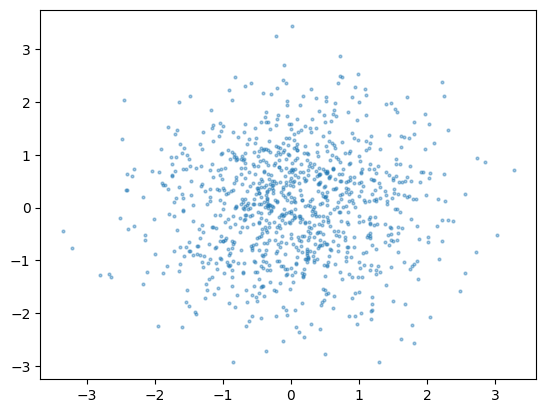

In [ ]:
# bvormal.py
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

N = 1000
r = 0.0 #change to 0.8 for other plot
Sigma = np.array([[1, r], [r, 1]])

B = np.linalg.cholesky(Sigma)
x = B @ randn(2,N)
plt.scatter([x[0,:]],[x[1,:]], alpha =0.4, s = 4)

In [ ]:
# accrejgamma.py
from math import exp, gamma, log
from numpy.random import rand

alpha = 1.3
lam = 5.6
f = lambda x: lam**alpha * x**(alpha-1) * exp(-lam*x)/gamma(alpha)
g = lambda x: 4*exp(-4*x)
C = 1.2
found = False

while not found:
    x =- log(rand())/4
    if C*g(x)*rand() <= f(x):
        found = True

print(x)

0.06340081232094572


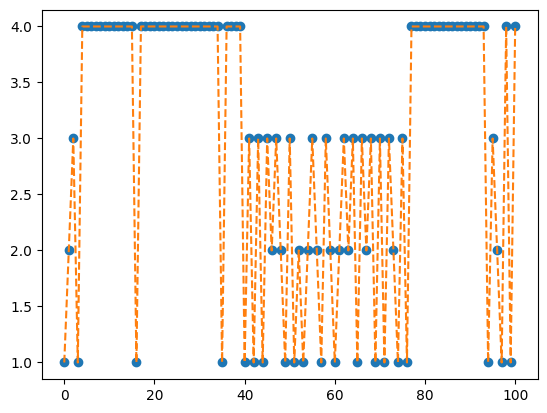

In [ ]:
# MCsim.py
import numpy as np
import matplotlib.pyplot as plt
n = 101
P = np.array([[0, 0.2, 0.5, 0.3],
            [0.5, 0, 0.5, 0],
            [0.3, 0.7, 0, 0],
            [0.1, 0, 0, 0.9]])
x = np.array(np.ones(n, dtype=int))
x[0] = 0
for t in range(0,n-1):
    x[t+1] = np.min(np.where(np.cumsum(P[x[t],:]) > np.random.rand()))

x = x + 1 #add 1 to all elements of the vector x
plt.plot(np.array(range(0,n)),x, 'o')
plt.plot(np.array(range(0,n)),x, '--')
plt.show()

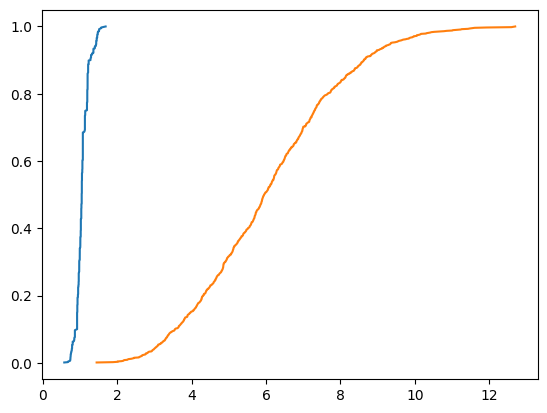

In [ ]:
# quotunif.py
import numpy as np
from numpy.random import rand, choice
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

n = 100
N = 1000
x = rand(n)/rand(n) # data
med = np.zeros(N)
ave = np.zeros(N)
for i in range(0,N):
    s = choice(x, n, replace=True) # resampled data
    med[i] = np.median(s)
    ave[i] = np.mean(s)

med_cdf = ECDF(med)
ave_cdf = ECDF(ave)
plt.plot(med_cdf.x, med_cdf.y)
plt.plot(ave_cdf.x, ave_cdf.y)
plt.show()

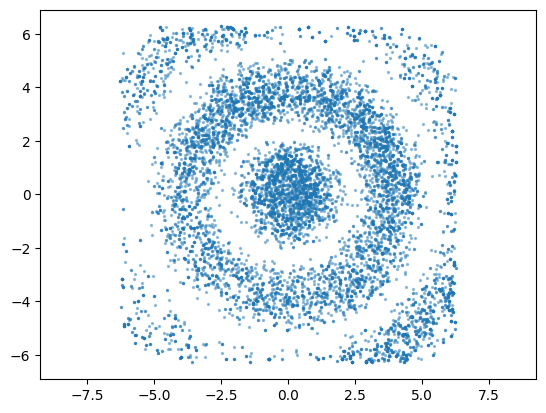

In [ ]:
# rwsamp.py
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, exp, sqrt, sin
from numpy.random import rand, randn

N = 10000
a = lambda x:-2*pi < x
b = lambda x: x < 2*pi
f = lambda x1, x2: exp(-sqrt(x1**2+x2**2)/4)*(sin(2*sqrt(x1**2+x2**2))+1)*a(x1)*b(x1)*a(x2)*b(x2)

xx = np.zeros((N,2))
x = np.zeros((1,2))

for i in range(1,N):
    y = x + randn(1,2)
    alpha = np.amin((f(y[0][0],y[0][1])/f(x[0][0],x[0][1]),1))
    r = rand() < alpha
    x = r*y + (1-r)*x
    xx[i,:] = x

plt.scatter(xx[:,0], xx[:,1], alpha =0.4,s =2)
plt.axis('equal')
plt.show()

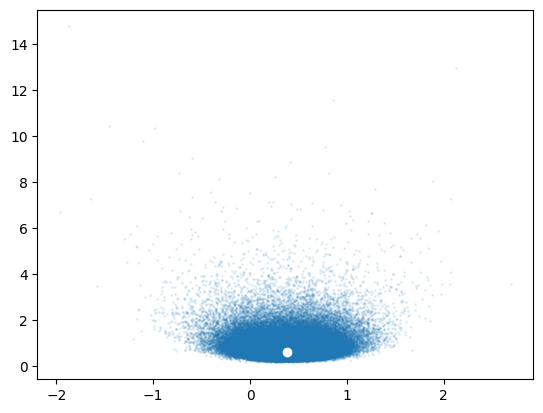

In [ ]:
# gibbsamp.py
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[-0.9472, 0.5401,-0.2166, 1.1890, 1.3170,-0.4056,-0.4449, 1.3284, 0.8338, 0.6044]])
n=x.size
sample_mean = np.mean(x)
sample_var = np.var(x)
sig2 = np.var(x)
mu=sample_mean

N=10**5
gibbs_sample = np.array(np.zeros((N, 2)))
for k in range(N):
    mu=sample_mean + np.sqrt(sig2/n)*np.random.randn()
    V=np.sum((x-mu)**2)/2
    sig2 = 1/np.random.gamma(n/2, 1/V)
    gibbs_sample[k,:]= np.array([mu, sig2])
plt.scatter(gibbs_sample[:,0], gibbs_sample[:,1],alpha =0.1,s =1)
plt.plot(np.mean(x), np.var(x),'wo')
plt.show()

# 3.3 Monte Carlo Estimation

In [ ]:
# mcint.py
import numpy as np
from numpy import pi

c = (2*pi)**(3/2)
H = lambda x: c*np.sqrt(np.abs(np.sum(x,axis=1)))
N = 10**6
z = 1.96
x = np.random.randn(N,3)
y = H(x)
mY = np.mean(y)
sY = np.std(y)
RE = sY/mY/np.sqrt(N)
print('Estimate = {:3.3f}, CI = ({:3.3f},{:3.3f})'.format(mY, mY*(1-z*RE), mY*(1+z*RE)))

Estimate = 17.040, CI = (17.026,17.054)


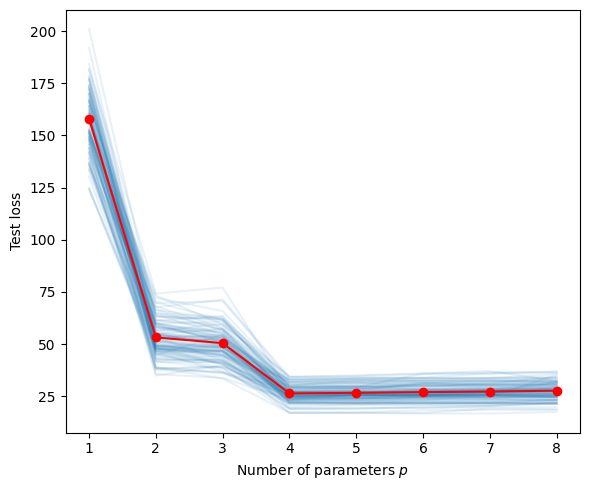

In [ ]:
# CMtestloss.py
import numpy as np, matplotlib.pyplot as plt
from numpy.random import rand, randn
from numpy.linalg import solve

def generate_data(beta, sig, n):
    u = rand(n, 1)
    y = (u ** np.arange(0, 4)) @ beta + sig * randn(n, 1)
    return u, y

beta = np.array([[10,-140, 400,-250]]).T
n = 100
sig = 5
betahat = {}
plt.figure(figsize=[6,5])
totMSE = np.zeros(8)
max_p = 8
p_range = np.arange(1, max_p + 1, 1)

for N in range(0,100):
    u, y = generate_data(beta, sig, n) #training data
    X = np.ones((n, 1))
    for p in p_range:
        if p > 1:
            X = np.hstack((X, u**(p-1)))
        betahat[p] = solve(X.T @ X, X.T @ y)

    u_test, y_test = generate_data(beta, sig, n) #test data
    MSE = []
    X_test = np.ones((n, 1))
    for p in p_range:
        if p > 1:
            X_test = np.hstack((X_test, u_test**(p-1)))
        y_hat = X_test @ betahat[p] # predictions
        MSE.append(np.sum((y_test- y_hat)**2/n))

    totMSE = totMSE + np.array(MSE)
    plt.plot(p_range, MSE,'C0',alpha=0.1)

plt.plot(p_range,totMSE/N,'r-o')
plt.xticks(ticks=p_range)
plt.xlabel('Number of parameters $p$')
plt.ylabel('Test loss')
plt.tight_layout()
plt.savefig('MSErepeatpy.pdf',format='pdf')
plt.show()

<ipython-input-37-4745936fdfd2>:46: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(A.flatten(),shade=True)


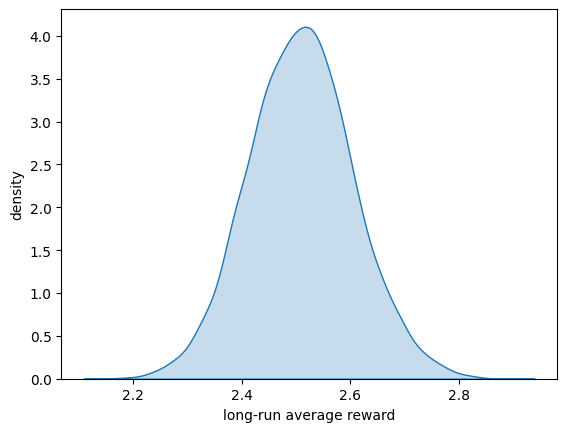

In [ ]:
# radioest.py
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
from numba import jit

np.random.seed(123)
n = 1000
P = np.array([[0, 0.2, 0.5, 0.3],
            [0.5 ,0, 0.5, 0],
            [0.3, 0.7, 0, 0],
            [0.1, 0, 0, 0.9]])
r = np.array([4,3,10,1])
Corg = np.array(np.zeros((n,1)))
Rorg = np.array(np.zeros((n,1)))
rho=0.9

# @jit() #for speed-up; see Appendix
def generate_cyclereward(n):
    for i in range(n):
        t=1
        xreg = 1 #regenerative state (out of 1,2,3,4)
        reward = r[0]
        x= np.amin(np.argwhere(np.cumsum(P[xreg-1,:]) > np.random.rand())) + 1
        while x != xreg:
            t += 1
            reward += rho**(t-1)*r[x-1]
            x = np.amin(np.where(np.cumsum(P[x-1,:]) > np.random.rand())) + 1
        Corg[i] = t
        Rorg[i] = reward
    return Corg, Rorg

Corg, Rorg = generate_cyclereward(n)

Aorg = np.mean(Rorg)/np.mean(Corg)
K = 5000
A = np.array(np.zeros((K,1)))
C = np.array(np.zeros((n,1)))
R = np.array(np.zeros((n,1)))
for i in range(K):
    ind = np.ceil(n*np.random.rand(1,n)).astype(int)[0]-1
    C = Corg[ind]
    R = Rorg[ind]
    A[i] = np.mean(R)/np.mean(C)

plt.xlabel('long-run average reward')
plt.ylabel('density')
sns.kdeplot(A.flatten(),shade=True)
plt.show()

In [ ]:
# mcintCV.py
# from mcint import *

# mcint.py
c = (2*pi)**(3/2)
H = lambda x: c*np.sqrt(np.abs(np.sum(x,axis=1)))
N = 10**6
z = 1.96
x = np.random.randn(N,3)
y = H(x)
mY = np.mean(y)
sY = np.std(y)
RE = sY/mY/np.sqrt(N)
# print('Estimate = {:3.3f}, CI = ({:3.3f},{:3.3f})'.format(mY, mY*(1-z*RE), mY*(1+z*RE)))


Yc = np.sum(x**2, axis=1) # control variable data
yc = 3 # true expectation of control variable
C = np.cov(y,Yc) # sample covariance matrix
cor = C[0][1]/np.sqrt(C[0][0]*C[1][1])
alpha = C[0][1]/C[1][1]

est = np.mean(y-alpha*(Yc-yc))
RECV = np.sqrt((1-cor**2)*C[0][0]/N)/est #relative error

print('Estimate = {:3.3f}, CI = ({:3.3f},{:3.3f}), Corr = {:3.3f}'.format(est, est*(1-z*RECV), est*(1+z*RECV),cor))

Estimate = 17.037, CI = (17.025,17.050), Corr = 0.481


In [ ]:
# impsampl.py
import numpy as np
from numpy import exp, sqrt, sin, pi, log, cos
from numpy.random import rand

b = 1000
H = lambda x1, x2: (2*b)**2 * exp(-sqrt(x1**2+x2**2)/4)*(sin(2*sqrt(x1**2+x2**2))+1)*(x1**2 + x2**2 < b**2)
f = 1/((2*b)**2)
N = 10**6
X1 =-b + 2*b*rand(N,1)
X2 =-b + 2*b*rand(N,1)
Z = H(X1,X2)
estCMC = np.mean(Z).item() # to obtain scalar
RECMC = np.std(Z)/estCMC/sqrt(N).item()
print('CI = ({:3.3f},{:3.3f}), RE = {: 3.3f}'.format(estCMC*(1-1.96*RECMC), estCMC*(1+1.96*RECMC),RECMC))

CI = (51.621,89.182), RE =  0.136


In [ ]:
# impsampl2.py
# from impsamp1 import *

lam = 0.1;
g = lambda x1, x2: lam*exp(-sqrt(x1**2 + x2**2)*lam)/sqrt(x1**2 + x2**2)/(2*pi);
U = rand(N,1); V = rand(N,1)
R =-log(U)/lam
X1 = R*cos(2*pi*V)
X2 = R*sin(2*pi*V)
Z = H(X1,X2)*f/g(X1,X2)
estIS = np.mean(Z).item() # obtain scalar
REIS = np.std(Z)/estIS/sqrt(N).item()
print('CI = ({:3.3f},{:3.3f}), RE = {: 3.3f}'.format(estIS*(1-1.96*REIS), estIS*(1+1.96*REIS),REIS))

CI = (100.653,101.008), RE =  0.001


# 3.4 Monte Carlo for Optimization

minimizer = 1.366, minimum =-0.958


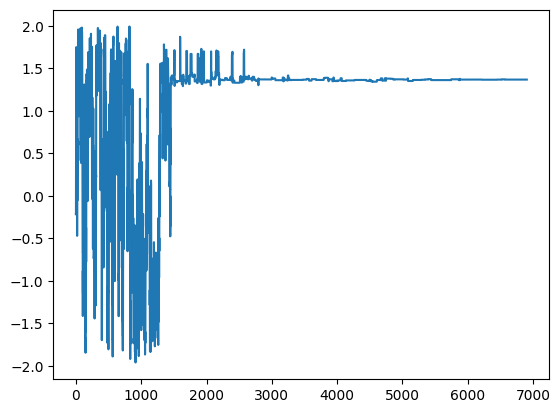

In [ ]:
# simann.py
import numpy as np
import matplotlib.pyplot as plt

def wiggly(x):
    y =-np.exp(x**2/100)*np.sin(13*x-x**4)**5*np.sin(1-3*x**2)**2
    ind = np.vstack((np.argwhere(x<-2),np.argwhere(x>2)))
    y[ind]=float('inf')
    return y

S = wiggly
beta = 0.999
sig = 0.5
T=1
x= np.array([0])
xx=[]
Sx=S(x)

while T>10**(-3):
    T=beta*T
    y = x+sig*np.random.randn()
    Sy = S(y)
    alpha = np.minimum(np.exp(-(Sy-Sx)/T),1)
    if np.random.uniform()<alpha:
        x=y
        Sx=Sy
    xx=np.hstack((xx,x))

print('minimizer = {:3.3f}, minimum ={:3.3f}'.format(x[0],Sx[0]))
plt.plot(xx)
plt.show()

In [ ]:
# CEmethod.py
# from simann import wiggly
import numpy as np

def wiggly(x): # Copy the wiggly function definition from simann.py
    y =-np.exp(x**2/100)*np.sin(13*x-x**4)**5*np.sin(1-3*x**2)**2
    ind = np.vstack((np.argwhere(x<-2),np.argwhere(x>2)))
    y[ind]=float('inf')
    return y

np.set_printoptions(precision=3)
mu, sigma = 0, 3
N, Nel = 100, 10
eps = 10**-5
S = wiggly
while sigma > eps:
    X = np.random.randn(N,1)*sigma + np.array(np.ones((N,1)))*mu
    Sx = np.hstack((X, S(X)))
    sortSx = Sx[Sx[:,1].argsort(),]
    Elite = sortSx[0:Nel,:-1]
    mu = np.mean(Elite, axis=0)
    sigma = np.std(Elite, axis=0)
    print('S(mu)= {}, mu: {}, sigma: {}\n'.format(S(mu), mu, sigma))

S(mu)= [-0.001], mu: [0.525], sigma: [0.847]

S(mu)= [0.005], mu: [1.022], sigma: [0.6]

S(mu)= [-0.897], mu: [1.395], sigma: [0.106]

S(mu)= [-0.958], mu: [1.367], sigma: [0.009]

S(mu)= [-0.958], mu: [1.366], sigma: [0.001]

S(mu)= [-0.958], mu: [1.366], sigma: [3.727e-05]

S(mu)= [-0.958], mu: [1.366], sigma: [3.836e-06]



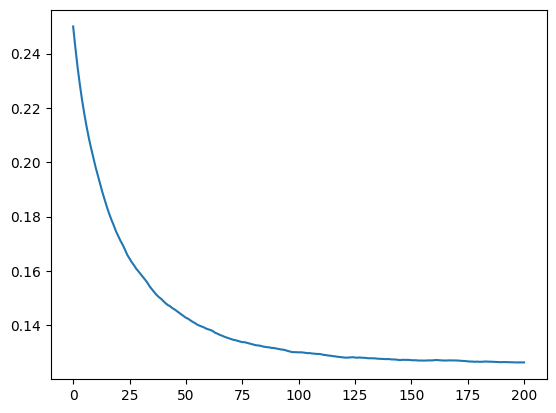

In [ ]:
# stochapprox.py
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

b=100 # choose b large enough, but not too large
delta = 0.01
H = lambda x1, x2: (2*b)**2*np.exp(-np.sqrt(x1**2 + x2**2)/4)*(np.sin(2*np.sqrt(x1**2+x2**2)+1))*(x1**2+x2**2<b**2)
f = 1/(2*b)**2
g = lambda x1, x2, lam: lam*np.exp(-np.sqrt(x1**2+x2**2)*lam)/np.sqrt(x1**2+x2**2)/(2*pi)

beta = 10**-7 #step size very small, as the gradient is large
lam=0.25
lams = np.array([lam])
N=10**4
for i in range(200):
    x1 =-b + 2*b*np.random.rand(N,1)
    x2 =-b + 2*b*np.random.rand(N,1)
    lamL = lam- delta/2
    lamR = lam + delta/2
    estL = np.mean(H(x1,x2)**2*f/g(x1, x2, lamL))
    estR = np.mean(H(x1,x2)**2*f/g(x1, x2, lamR)) #use SAME x1,x2
    gr = (estR-estL)/delta #gradient
    lam = lam- gr*beta #gradient descend
    lams = np.hstack((lams, lam))
    beta = beta*0.99

lamsize=range(0, (lams.size))
plt.plot(lamsize, lams)
plt.show()

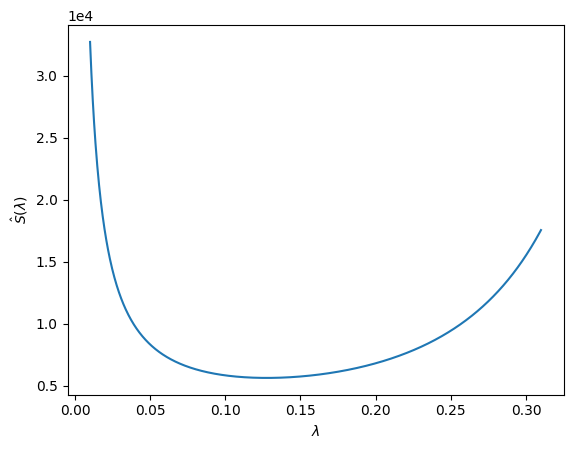

In [ ]:
# stochcounterpart.py
# from stochapprox import *

lams = np.linspace(0.01, 0.31, 1000)
res=[]
res = np.array(res)
for i in range(lams.size):
    lam = lams[i]
    np.random.seed(1)
    g = lambda x1, x2: lam*np.exp(-np.sqrt(x1**2+x2**2)*lam)/np.sqrt(x1**2+x2**2)/(2*pi)
    X=-b+2*b*np.random.rand(N,1)
    Y=-b+2*b*np.random.rand(N,1)
    Z=H(X,Y)**2*f/g(X,Y)
    estCMC = np.mean(Z)
    res = np.hstack((res, estCMC))

plt.plot(lams, res)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\hat{S}(\lambda)$')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

In [ ]:
# Snoisy.py
import numpy as np

def Snoisy(X): #takes a matrix
    n = X.shape[1]
    N = X.shape[0]
    # true binary vector
    xorg = np.hstack((np.ones((1,n//2)), np.zeros((1,n//2))))
    theta = 0.4 # probability to flip the input
    # storing the number of bits unequal to the true vector
    s = np.zeros(N)
    for i in range(0,N):
        # determine which bits to flip
        flip = (np.random.uniform(size=(n)) < theta).astype(int)
        ind = flip>0
        X[i][ind] = 1-X[i][ind]
        s[i] = (X[i] != xorg).sum()
    return s

In [ ]:
# CEnoisy.py
# from Snoisy import Snoisy
import numpy as np
n = 100
rho = 0.1
N = 1000; Nel = int(N*rho); eps = 0.01
p = 0.5*np.ones(n)
i = 0
pstart = p
ps = np.zeros((1000,n))
ps[0] = pstart
pdist = np.zeros((1,1000))
while np.max(np.minimum(p,1-p)) > eps:
    i += 1
    X = (np.random.uniform(size=(N,n)) < p).astype(int)
    X_tmp = np.array(X, copy=True)
    SX = Snoisy(X_tmp)
    ids = np.argsort(SX,axis=0)
    Elite = X[ids[0:Nel],:]
    p = np.mean(Elite,axis=0)
    ps[i] = p
print(p)

[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.
 0.   0.  ]
